Analysis:

Right now, the highest temperatures are between 0 and 40 degrees.

It is more humid north of the Equator, between 20-60 degrees. It is the least humid between -60 to -40 degrees.

The highest concentration of clouds (90%) are 40-80 degrees north of the equator, which almost correlates with the higher humidity locations. 

Right now, there's very little wind in majority of the cities. Most of the wind speeds are below 15 mph in all latitude regions.



In [2]:
# Dependencies and Setup
# https://docs.python.org/3/library/urllib.request.html#module-urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
import api_keys

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_longs and cities
lat_lngs = []
cities = []

# Random lat and long combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

## Perform API Calls

In [12]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Long": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=namibe
Processing Record 2 of Set 1 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=meulaboh
Processing Record 3 of Set 1 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=clyde%20river
Processing Record 4 of Set 1 | estelle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=estelle
Processing Record 5 of Set 1 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=port%20lincoln
Processing Record 6 of Set 1 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=esperance
Processing Rec

Processing Record 3 of Set 2 | ipixuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=ipixuna
Processing Record 4 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=mar%20del%20plata
Processing Record 5 of Set 2 | martapura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=martapura
Processing Record 6 of Set 2 | novooleksiyivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=novooleksiyivka
Processing Record 7 of Set 2 | peterhead
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=peterhead
Processing Record 8 of Set 2 | nicoya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=nicoya
Processing Record 9 of Set 2 | ambon
http://api.openweathermap

Processing Record 5 of Set 3 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=saint%20george
Processing Record 6 of Set 3 | bull savanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=bull%20savanna
Processing Record 7 of Set 3 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=avarua
Processing Record 8 of Set 3 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=chokurdakh
Processing Record 9 of Set 3 | non sang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=non%20sang
Processing Record 10 of Set 3 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=shimoda
Processing Record 11 of Set 3 | saint anthony
http://api.openweathe

Processing Record 9 of Set 4 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=bambous%20virieux
Processing Record 10 of Set 4 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=port%20alfred
Processing Record 11 of Set 4 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=severo-kurilsk
Processing Record 12 of Set 4 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=castro
Processing Record 13 of Set 4 | sabla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=sabla
Processing Record 14 of Set 4 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=atuona
Processing Record 15 of Set 4 | zverinogolovskoye
http://api.

Processing Record 12 of Set 5 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=yulara
Processing Record 13 of Set 5 | bafra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=bafra
City not found. Skipping...
Processing Record 14 of Set 5 | lashio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=lashio
Processing Record 15 of Set 5 | mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=mayumba
Processing Record 16 of Set 5 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 5 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=souillac
Processing Record 18 of Set 5 | cap-

Processing Record 16 of Set 6 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=broome
Processing Record 17 of Set 6 | juneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=juneau
Processing Record 18 of Set 6 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=hithadhoo
Processing Record 19 of Set 6 | inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=inta
Processing Record 20 of Set 6 | jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=jalu
Processing Record 21 of Set 6 | amalapuram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=amalapuram
Processing Record 22 of Set 6 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 19 of Set 7 | visby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=visby
Processing Record 20 of Set 7 | morgantown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=morgantown
Processing Record 21 of Set 7 | la macarena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=la%20macarena
Processing Record 22 of Set 7 | tahoua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=tahoua
Processing Record 23 of Set 7 | weiden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=weiden
Processing Record 24 of Set 7 | carballo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=carballo
Processing Record 25 of Set 7 | kahului
http://api.openweathermap.org/data/2.5/weath

Processing Record 23 of Set 8 | ulagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=ulagan
Processing Record 24 of Set 8 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=sioux%20lookout
Processing Record 25 of Set 8 | znamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=znamenskoye
Processing Record 26 of Set 8 | lolodorf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=lolodorf
Processing Record 27 of Set 8 | khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=khasan
Processing Record 28 of Set 8 | mankono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=mankono
Processing Record 29 of Set 8 | callaway
http://api.openweathermap.org/dat

Processing Record 27 of Set 9 | raglan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=raglan
Processing Record 28 of Set 9 | espanola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=espanola
Processing Record 29 of Set 9 | singkang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=singkang
Processing Record 30 of Set 9 | puerto madryn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=puerto%20madryn
Processing Record 31 of Set 9 | zeya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=zeya
Processing Record 32 of Set 9 | devils lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=devils%20lake
Processing Record 33 of Set 9 | gold coast
http://api.openweathermap.org/d

City not found. Skipping...
Processing Record 30 of Set 10 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=mehamn
Processing Record 31 of Set 10 | dondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=dondo
Processing Record 32 of Set 10 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=camacha
Processing Record 33 of Set 10 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=biak
Processing Record 34 of Set 10 | izhma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=izhma
Processing Record 35 of Set 10 | tawang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=tawang
Processing Record 36 of Set 10 | monaco-ville
http://api.openweathermap.org/da

Processing Record 33 of Set 11 | bayji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=bayji
Processing Record 34 of Set 11 | song phi nong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=song%20phi%20nong
Processing Record 35 of Set 11 | kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=kidal
Processing Record 36 of Set 11 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=muros
Processing Record 37 of Set 11 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=brae
Processing Record 38 of Set 11 | nampula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=nampula
Processing Record 39 of Set 11 | umm durman
http://api.openweathermap.org/data/2.5/weather

Processing Record 36 of Set 12 | parrita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=parrita
Processing Record 37 of Set 12 | satitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=satitoa
City not found. Skipping...
Processing Record 38 of Set 12 | kandrian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=kandrian
Processing Record 39 of Set 12 | severnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=severnoye
Processing Record 40 of Set 12 | lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=lufilufi
Processing Record 41 of Set 12 | omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b6593e05daebb23edc980b83d7543d7&q=omsukchan
Processing Record 42 of Set 12 | abalak
http://a

In [13]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Long          542
Max Temp      542
Wind Speed    542
dtype: int64

In [14]:
# Display the City Data Frame
city_data_pd.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,namibe,0,AO,1535251975,100,-15.19,12.15,63.53,7.20
1,meulaboh,32,ID,1535251863,98,4.14,96.13,82.52,3.18
2,clyde river,1,CA,1535248800,93,70.47,-68.59,35.60,11.41
3,estelle,1,US,1535249700,44,32.87,-97.01,91.94,4.70
4,port lincoln,32,AU,1535251874,92,-34.72,135.86,58.85,9.55


Latitude vs Temperature Plot

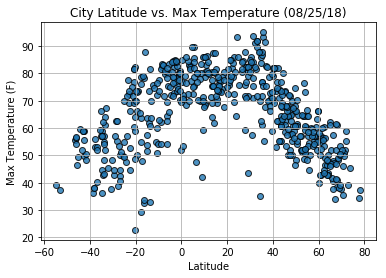

In [15]:
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude vs. Humidity Plot

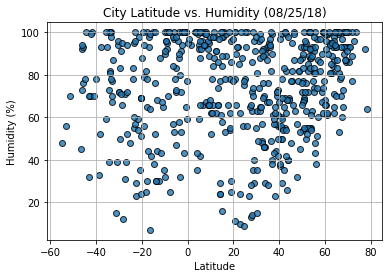

In [17]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude vs. Cloudiness Plot

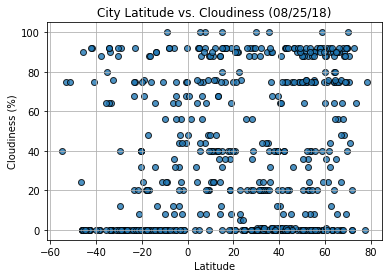

In [18]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

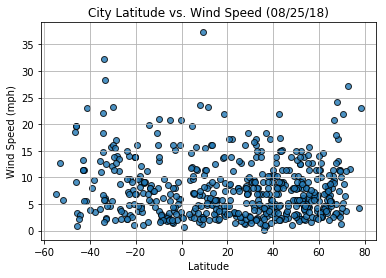

In [19]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()